# 1) Setup

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [23]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

print("done")

done


In [41]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  6 15:11:34 2021

@author: pyliu
"""

import networkx as nx
import yaml
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import re

def draw_graph_tsc(filename = "tsc_map.yaml", print_labels = False):
    """
    Draw network visualisation graph from a .YAML topological map

    Parameters
    ----------
    filename : STR
        Filename of a .YAML file. The default is "tsc_map.yaml".
    print_labels: bool
        If True, print a list of node names. The default is False.

    Returns
    -------
    G : NetworkX graph
        Network visualisation graph

    """
    #1) initialise empty lists to store data
    nodes = []
    adjacent_nodes = []
    adjacent_coords = []
    node_coords = []
    edge_length = []
    
    #2) open yaml file and extract information
    with open(filename) as file:
        documents = yaml.full_load(file)
        for i in range(len(documents)):
            #Waypoint of current node
            nodes.append(documents[i]["meta"]["node"])
    
            #Waypoints of connecting nodes
            adjacent_nodes_temp = []
            for j in range(len(documents[i]["node"]["edges"])):
                adjacent_nodes_temp.append(documents[i]["node"]["edges"][j]["node"])
            adjacent_nodes.append(adjacent_nodes_temp)
    
            #xy coords of current node
            node_coords.append([documents[i]["node"]["pose"]["position"]["x"], documents[i]["node"]["pose"]["position"]["y"]])
    
    #3) synthesize additional information about edge length and number of adjacent nodes
    for i in range(len(nodes)):
        coords_temp = []
        length_temp = []
        for adjacent in adjacent_nodes[i]:
            x1 = node_coords[i][0]
            y1 = node_coords[i][1]
    
            #xy coords of connecting nodes
            adjacent_ind = nodes.index(adjacent)
            x2 = node_coords[adjacent_ind][0]
            y2 = node_coords[adjacent_ind][1]
            coords_temp.append([x2,y2])
    
            #distance to connecting nodes (from current node)
            length = np.sqrt( (x2-x1)**2 + (y2-y1)**2 )
            length_temp.append(length)
    
        adjacent_coords.append(coords_temp)
        edge_length.append(length_temp)
    
    #4) Draw Graph
    #initialise empty graph
    G = nx.Graph()
    
    #add nodes
    for i in range(len(nodes)):
        abbrev = re.findall('([A-Z,0-9])', nodes[i])
        abbrev = ''.join(abbrev)
        G.add_node(abbrev, pos=(node_coords[i][0], node_coords[i][1]), color = "orange" )

    #add edges
    for i in range(len(nodes)):
        for j in range(len(adjacent_nodes[i])):
            origin = re.findall('([A-Z,0-9])', nodes[i])
            origin = ''.join(origin)

            target = re.findall('([A-Z,0-9])', adjacent_nodes[i][j])
            target = ''.join(target)

            G.add_edge(origin, target)
    if print_labels == True:
        print(nodes)
    #draw
    nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_color = "orange", edge_color = "steelblue", edge_weight = 0.5, node_size = 50, font_size = 3, font_weight = "bold")
    plt.savefig("recent_map.png", dpi = 1000)
    return G

# 2) Draw topological maps

['ChargingPoint1', 'ChargingPoint2', 'WayPoint1', 'WayPoint10', 'WayPoint2', 'WayPoint3', 'WayPoint4', 'WayPoint5', 'WayPoint6', 'WayPoint7', 'WayPoint9']


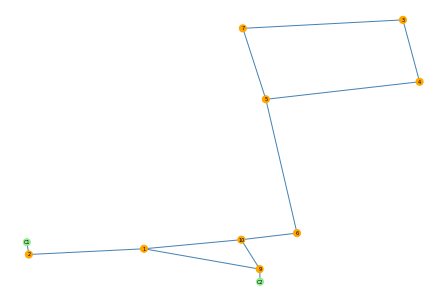

In [42]:
G = draw_graph("labs_map.yaml")

['Ambulanz', 'Cafeteria', 'ChargingPoint', 'Eingang', 'Feuerloescher', 'Frisoer', 'Kapelle', 'Kindergarten', 'Konferenzraum', 'Lift1', 'Lift2', 'Lift3', 'Rezeption', 'Seminarraum', 'Station', 'Teekueche', 'WalkingGruppeStart', 'WayPoint11', 'WayPoint111', 'WayPoint12', 'WayPoint13', 'WayPoint14', 'WayPoint15', 'WayPoint16', 'WayPoint17', 'WayPoint18', 'WayPoint19', 'WayPoint2', 'WayPoint20', 'WayPoint21', 'WayPoint25', 'WayPoint26', 'WayPoint28', 'WayPoint3', 'WayPoint31', 'WayPoint32', 'WayPoint34', 'WayPoint35', 'WayPoint39', 'WayPoint4', 'WayPoint42', 'WayPoint43', 'WayPoint44', 'WayPoint45', 'WayPoint46', 'WayPoint47', 'WayPoint48', 'WayPoint49', 'WayPoint50', 'WayPoint51', 'WayPoint52', 'WayPoint53', 'WayPoint54', 'WayPoint55', 'WayPoint56', 'WayPoint57', 'WayPoint58', 'WayPoint59', 'WayPoint60', 'WayPoint61', 'WayPoint62', 'WayPoint63', 'WayPoint64', 'WayPoint65', 'WayPoint66', 'WayPoint67', 'WayPoint68', 'WayPoint69', 'WayPoint7', 'WayPoint70', 'WayPoint71', 'WayPoint72', 'WayPo

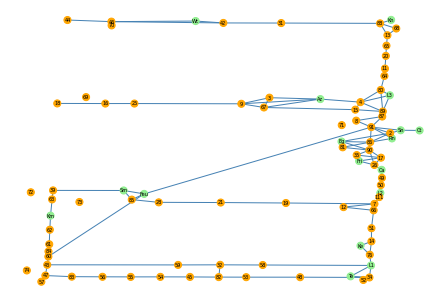

In [43]:
G = draw_graph("aaf_map.yaml")

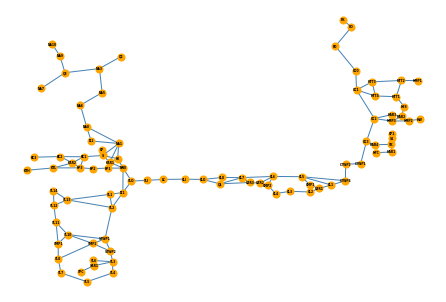

In [44]:
G = draw_graph_tsc("tsc_map.yaml")